# Week-7

Decision trees and KNN

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

## Decision Trees

**Decision stumps**

A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes. A decision stump partitions the dataset based on a single question: $f_k < \theta$. This is therefore the simplest decision tree that we can come up with.

---
Use the following decision stump for problems 1 and 3: The root has $1000$ data-points out of which $200$ belong to class-1. The left child-node has $100$ data-points out of which $50$ belong to class-1.

### Problem-1

Write a function `entropy` that accepts the proportion of points that belong to class-1 in a node as argument and returns the entropy. Use $\log_2$ for all computations.

Use this function to compute the entropy of the parent node.

In [6]:
### Solution ###
### Problem-1
import numpy as np

def entropy(p):
    """
    Computes the entropy of a node given the proportion of points belonging to class-1.

    Args:
        p (float): Proportion of data-points belonging to class-1 in a node.

    Returns:
        float: Entropy of the node.
    """
    if p == 0 or p == 1:
        return 0
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

# Given values for the parent node
total_points_parent = 1000
class1_points_parent = 200
p_parent = class1_points_parent / total_points_parent
entropy_parent = entropy(p_parent)
print(f"Entropy of the parent node: {entropy_parent}")


Entropy of the parent node: 0.7219280948873623


### Problem-2

Plot the entropy of a node as a function of $p$, the proportion of data-points that belong to class $+1$.

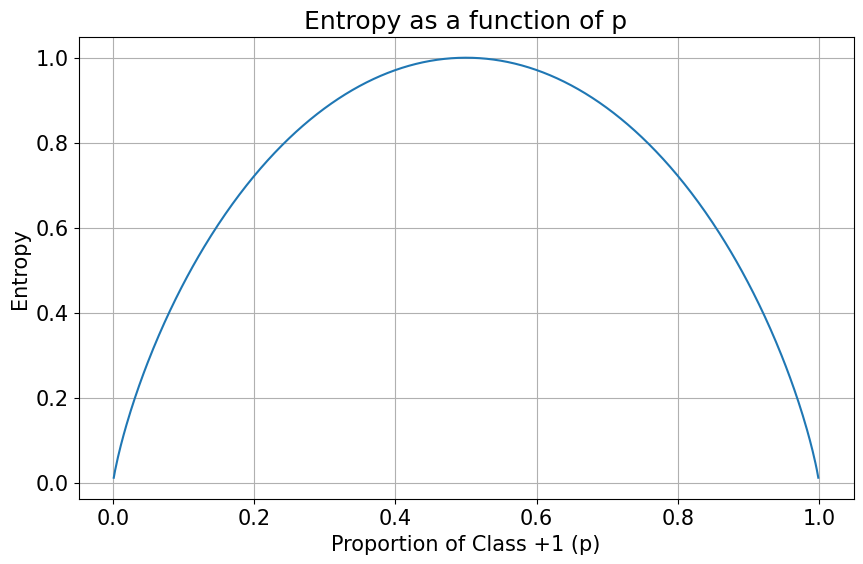

In [7]:
### Solution ###
### Problem-2
import matplotlib.pyplot as plt

p_values = np.linspace(0.001, 0.999, 500)  # Avoid p=0 or p=1 for log calculation
entropy_values = [entropy(p) for p in p_values]

plt.figure(figsize=(10, 6))
plt.plot(p_values, entropy_values)
plt.title('Entropy as a function of p')
plt.xlabel('Proportion of Class +1 (p)')
plt.ylabel('Entropy')
plt.grid(True)
plt.show()


### Problem-3

Write a function `IG` that accepts the following arguments:

- `E`: entropy of the parent node `Q`
- `El`: entropy of the left child `L`
- `Er`: entropy of the right child `R`
- `gamma`: proportion of data-points in left child

Use this function to compute the information gain for the parent node.

In [8]:
### Solution ###
### Problem-3
def IG(E, El, Er, gamma):
    """
    Computes the Information Gain (IG) for a split.

    Args:
        E (float): Entropy of the parent node Q.
        El (float): Entropy of the left child L.
        Er (float): Entropy of the right child R.
        gamma (float): Proportion of data-points in the left child.

    Returns:
        float: Information Gain.
    """
    return E - (gamma * El + (1 - gamma) * Er)

# Given values for the decision stump:
# Parent node: 1000 data-points, 200 class-1
# Left child: 100 data-points, 50 class-1

# Calculate proportion for parent
total_points_parent = 1000
class1_points_parent = 200
p_parent = class1_points_parent / total_points_parent
E_parent = entropy(p_parent)

# Calculate proportion and entropy for left child
total_points_left = 100
class1_points_left = 50
p_left = class1_points_left / total_points_left
El_left = entropy(p_left)

# Calculate properties for right child
# Points in right child = total_parent - points_left = 1000 - 100 = 900
# Class-1 points in right child = total_class1_parent - class1_points_left = 200 - 50 = 150
total_points_right = total_points_parent - total_points_left
class1_points_right = class1_points_parent - class1_points_left
p_right = class1_points_right / total_points_right
Er_right = entropy(p_right)

# Calculate gamma (proportion of data-points in left child)
gamma_val = total_points_left / total_points_parent

information_gain = IG(E_parent, El_left, Er_right, gamma_val)
print(f"Information gain for the parent node: {information_gain}")



Information gain for the parent node: 0.03690791540384364


### Problem-4

Consider a decision stump with $1000$ data-points. Call the root node $Q$ and the left and right leaf nodes $L$ and $R$.

- The proportion of data-points that belong to class $+1$ in $Q$ is equal to $0.4$
- The proportion of points in the left node is equal to $0.7$, that is, $\gamma = 0.7$
-  $q$ is the proportion of data-points that belong to class $+1$ in $L$

What are the minimum ($q_{\min}$) and maximum ($q_{\max}$) values of $q$?

In [9]:
### Solution ###
### Problem-4
# Given:
# Total data-points in Q = 1000
# Proportion of class +1 in Q (p_Q) = 0.4
# Proportion of points in L (gamma) = 0.7
# q = proportion of data-points that belong to class +1 in L

# Number of class +1 points in Q = 0.4 * 1000 = 400
# Number of points in L = 0.7 * 1000 = 700
# Number of points in R = 1000 - 700 = 300

# Let 'c1_L' be the number of class +1 points in L
# Let 'c1_R' be the number of class +1 points in R

# We know: c1_L + c1_R = 400 (total class +1 points in Q)

# Constraints for q:
# 1. c1_L >= 0  => q * 700 >= 0 => q >= 0
# 2. c1_L <= 700 (cannot have more class +1 points than total points in L) => q * 700 <= 700 => q <= 1

# Constraints for c1_R:
# 3. c1_R >= 0 => 400 - c1_L >= 0 => c1_L <= 400 => q * 700 <= 400 => q <= 400/700 = 4/7
# 4. c1_R <= 300 => 400 - c1_L <= 300 => 100 <= c1_L => 100 <= q * 700 => q >= 100/700 = 1/7

# Combining all constraints:
# q >= 0
# q <= 1
# q <= 4/7
# q >= 1/7

q_min = 1/7
q_max = 4/7

print(f"Minimum value of q (q_min): {q_min}")
print(f"Maximum value of q (q_max): {q_max}")


Minimum value of q (q_min): 0.14285714285714285
Maximum value of q (q_max): 0.5714285714285714


### Problem-5

Using the above information, plot the information gain of the root as a function of $q$, where $q \in [q_{\min}, q_{\max}]$. Record at least two interesting observations.

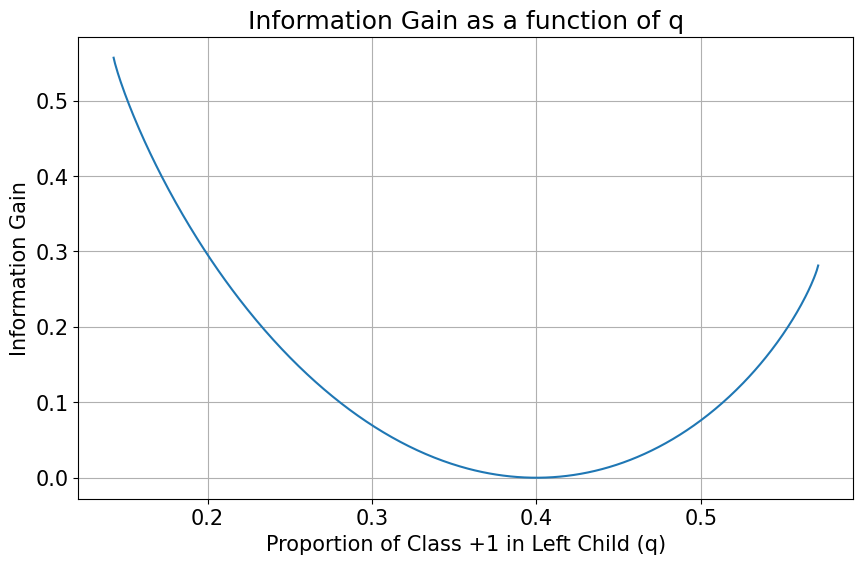

Observations:
- The information gain is maximized when the left and right child nodes are as pure as possible, i.e., when q is close to 0 or 1 (at the boundaries of the valid range for q).
- The information gain is minimized when the distribution of classes in the child nodes is similar to the parent node, or when the children are highly mixed.


In [10]:
### Solution ###
### Problem-5
# Reusing the functions entropy and IG from previous problems

# Given:
# Total data-points in Q = 1000
# p_Q = 0.4
# gamma = 0.7

p_Q = 0.4
gamma = 0.7
E_Q = entropy(p_Q)

q_values = np.linspace(q_min, q_max, 500)
ig_values = []

for q in q_values:
    El_L = entropy(q) # Entropy of left child

    # Calculate p_R (proportion of class +1 in R)
    # Number of class +1 in L = q * (gamma * 1000)
    # Number of class +1 in Q = p_Q * 1000
    # Number of class +1 in R = (p_Q * 1000) - (q * gamma * 1000)
    # Number of points in R = (1 - gamma) * 1000
    p_R = (p_Q - q * gamma) / (1 - gamma)
    Er_R = entropy(p_R) # Entropy of right child

    ig_values.append(IG(E_Q, El_L, Er_R, gamma))

plt.figure(figsize=(10, 6))
plt.plot(q_values, ig_values)
plt.title('Information Gain as a function of q')
plt.xlabel('Proportion of Class +1 in Left Child (q)')
plt.ylabel('Information Gain')
plt.grid(True)
plt.show()

print("Observations:")
print("- The information gain is maximized when the left and right child nodes are as pure as possible, i.e., when q is close to 0 or 1 (at the boundaries of the valid range for q).")
print("- The information gain is minimized when the distribution of classes in the child nodes is similar to the parent node, or when the children are highly mixed.")


### Problem-6

We will work with the dataset `X` for the next five problems. Visualize the data using a scatter plot. Color the points that belong to class $+1$ using "green" and those that belong to class $0$ using "red".

In [11]:
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

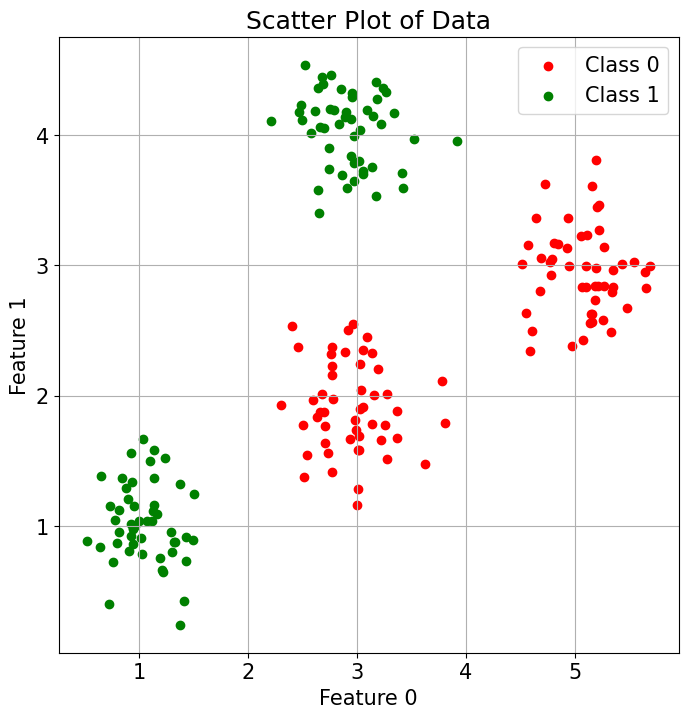

In [12]:
### Solution ###
### Problem-6
# Data generation code is provided in the notebook.
# X and y are already defined.

plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Class 1')
plt.title('Scatter Plot of Data')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.grid(True)
plt.show()


### Problem-7

If you were to use a decision stump as a classifier:

- What is the best question $f_k < \theta$?
    - enter the feature index, $k$ (use zero-indexing)
    - enter the value of $\theta$
- What is the information gain for this question?

---

Write the function named `best_split` to solve this problem:

The function should accept the feature matrix `X` and the label vector `y` as arguements. It should return the tuple `(feat_best, value_best, ig_best)`.

In [13]:
### Solution ###
### Problem-7
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

def IG(E, El, Er, gamma):
    return E - (gamma * El + (1 - gamma) * Er)

def best_split(X, y):
    """
    Finds the best decision stump split (feature and threshold) that maximizes information gain.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Label vector.

    Returns:
        tuple: (feat_best, value_best, ig_best)
            feat_best (int): Index of the best feature for splitting.
            value_best (float): Threshold value for the best split.
            ig_best (float): Maximum information gain achieved.
    """
    n_samples, n_features = X.shape
    ig_best = -1
    feat_best = -1
    value_best = -1

    # Entropy of the parent node
    p_parent = np.sum(y == 1) / n_samples
    E_parent = entropy(p_parent)

    for feat_idx in range(n_features):
        # Try all unique values as potential thresholds
        unique_values = np.unique(X[:, feat_idx])
        for value in unique_values:
            # Split the data
            left_mask = X[:, feat_idx] < value
            right_mask = ~left_mask

            y_left = y[left_mask]
            y_right = y[right_mask]

            n_left = len(y_left)
            n_right = len(y_right)

            if n_left == 0 or n_right == 0:
                continue

            # Calculate entropy for left child
            p_left = np.sum(y_left == 1) / n_left
            El_left = entropy(p_left)

            # Calculate entropy for right child
            p_right = np.sum(y_right == 1) / n_right
            Er_right = entropy(p_right)

            # Calculate gamma
            gamma = n_left / n_samples

            # Calculate Information Gain
            current_ig = IG(E_parent, El_left, Er_right, gamma)

            if current_ig > ig_best:
                ig_best = current_ig
                feat_best = feat_idx
                value_best = value

    return feat_best, value_best, ig_best

feat_best, value_best, ig_best = best_split(X, y)
print(f"Best feature index (k): {feat_best}")
print(f"Best threshold value (theta): {value_best}")
print(f"Information gain for this question: {ig_best}")


Best feature index (k): 0
Best threshold value (theta): 2.2996223648670857
Information gain for this question: 0.31925145895127793


### Problem-8

Grow a decision tree for this problem. You may have to use two programming concepts:

- recursion
- binary trees

Once you have grown the tree, answer the following questions:

- How many internal nodes does your tree have?
- How many leaf nodes does it have?

In [14]:
### Solution ###
### Problem-8
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature       # Index of feature to split on
        self.threshold = threshold   # Threshold value for the split
        self.left = left             # Left child node
        self.right = right           # Right child node
        self.value = value           # Class label if it's a leaf node

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
        self.internal_nodes_count = 0
        self.leaf_nodes_count = 0

    def _entropy(self, p):
        if p == 0 or p == 1:
            return 0
        return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

    def _information_gain(self, y, y_left, y_right):
        n = len(y)
        n_left = len(y_left)
        n_right = len(y_right)

        if n_left == 0 or n_right == 0:
            return 0

        p_parent = np.sum(y == 1) / n
        E_parent = self._entropy(p_parent)

        p_left = np.sum(y_left == 1) / n_left
        El_left = self._entropy(p_left)

        p_right = np.sum(y_right == 1) / n_right
        Er_right = self._entropy(p_right)

        gamma = n_left / n
        return E_parent - (gamma * El_left + (1 - gamma) * Er_right)

    def _best_split(self, X, y):
        n_samples, n_features = X.shape
        if n_samples < self.min_samples_split:
            return None, None, -1

        ig_best = -1
        feat_best = None
        value_best = None

        # Calculate parent entropy once
        p_parent = np.sum(y == 1) / n_samples
        E_parent = self._entropy(p_parent)

        for feat_idx in range(n_features):
            unique_values = np.unique(X[:, feat_idx])
            for value in unique_values:
                left_mask = X[:, feat_idx] < value
                y_left = y[left_mask]
                y_right = y[~left_mask]

                current_ig = self._information_gain(y, y_left, y_right)

                if current_ig > ig_best:
                    ig_best = current_ig
                    feat_best = feat_idx
                    value_best = value
        return feat_best, value_best, ig_best

    def _grow_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1 or len(y) < self.min_samples_split:
            self.leaf_nodes_count += 1
            # Return the majority class as the leaf value
            return Node(value=np.bincount(y).argmax())

        feature, threshold, ig = self._best_split(X, y)

        if ig <= 0:  # No significant information gain, make it a leaf
            self.leaf_nodes_count += 1
            return Node(value=np.bincount(y).argmax())

        self.internal_nodes_count += 1
        left_mask = X[:, feature] < threshold
        right_mask = ~left_mask

        left_child = self._grow_tree(X[left_mask], y[left_mask], depth + 1)
        right_child = self._grow_tree(X[right_mask], y[right_mask], depth + 1)

        return Node(feature, threshold, left_child, right_child)

    def fit(self, X, y):
        self.internal_nodes_count = 0
        self.leaf_nodes_count = 0
        self.root = self._grow_tree(X, y, 0)

# Create and fit the decision tree
# Set max_depth to None to allow it to grow until purity or min_samples_split
tree = DecisionTree(min_samples_split=2)
tree.fit(X, y)

print(f"Number of internal nodes: {tree.internal_nodes_count}")
print(f"Number of leaf nodes: {tree.leaf_nodes_count}")


Number of internal nodes: 3
Number of leaf nodes: 4


### Problem-9

Predict the label of the point $(3, 4)$.

In [15]:
### Solution ###
### Problem-9
# Using the DecisionTree class from Problem 8

def predict_single_point(node, x_test):
    """
    Predicts the label for a single test point using the trained decision tree.
    """
    if node.value is not None:  # It's a leaf node
        return node.value

    if x_test[node.feature] < node.threshold:
        return predict_single_point(node.left, x_test)
    else:
        return predict_single_point(node.right, x_test)

point_to_predict = np.array([3, 4])
predicted_label = predict_single_point(tree.root, point_to_predict)
print(f"Predicted label for point (3, 4): {predicted_label}")


Predicted label for point (3, 4): 1


### Problem-10

Plot the decision boundary.

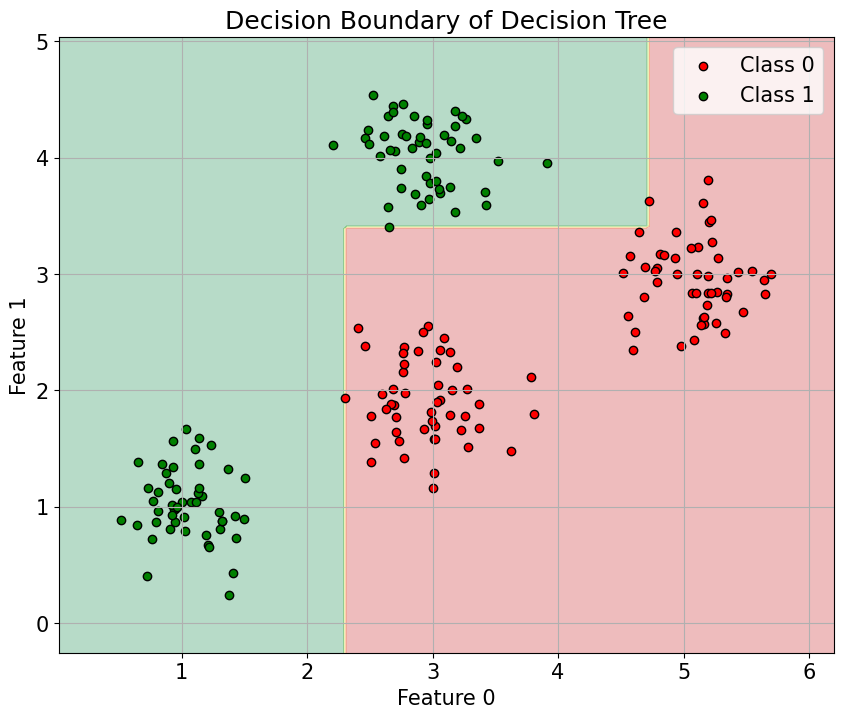

In [16]:
### Solution ###
### Problem-10
def plot_decision_boundary(X, y, tree):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = np.array([predict_single_point(tree.root, np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlGn)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', edgecolors='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Class 1', edgecolors='k')
    plt.title('Decision Boundary of Decision Tree')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, tree)




## KNN


In [ ]:
### Data ###
### DO NOT EDIT THIS CELL ###
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))
### DO NOT EDIT THIS CELL ###

### Problem-11

Visualize the data using a scatter plot. Use red for class $0$ and green for class $1$.

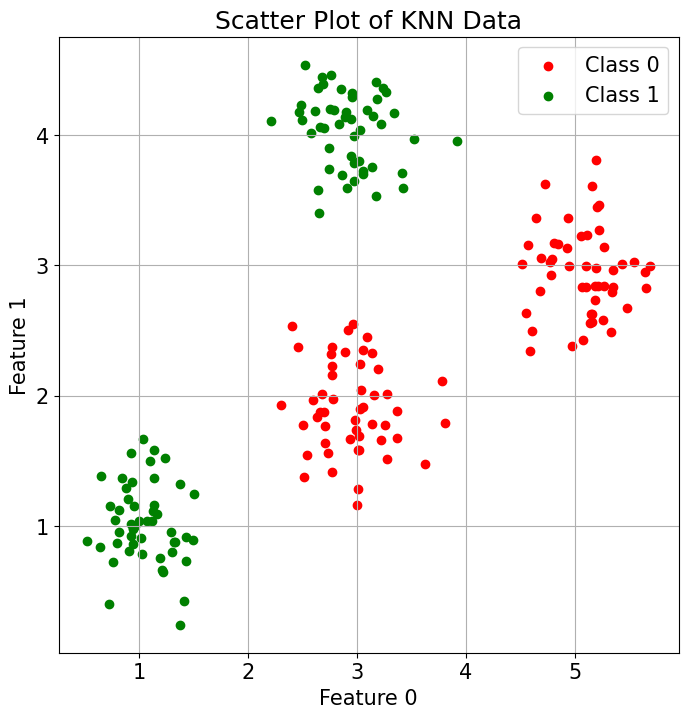

In [17]:
### Solution ###
### Problem-11
# KNN data generation is provided in the notebook.
# X and y are already defined for KNN.

plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Class 1')
plt.title('Scatter Plot of KNN Data')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.grid(True)
plt.show()


### Problem-12

Write a function `predict` that accepts the following arguments:

- `X` - feature matrix
- `y` - label vector
- `x_test` - test data-point
- `k` - number of neighbors

The function should return the prediction for the point `x_test`. Use this function to compute the predicted label for the point $(-3, -2)$ with $k = 10$.

In [18]:
### Solution ###
### Problem-12
def predict_knn(X, y, x_test, k):
    """
    Predicts the label for a single test data-point using KNN.

    Args:
        X (np.ndarray): Feature matrix of training data.
        y (np.ndarray): Label vector of training data.
        x_test (np.ndarray): Test data-point.
        k (int): Number of neighbors.

    Returns:
        int: Predicted label for x_test.
    """
    # Calculate Euclidean distances from x_test to all points in X
    distances = np.sqrt(np.sum((X - x_test)**2, axis=1))

    # Get the indices of the k nearest neighbors
    k_nearest_indices = np.argsort(distances)[:k]

    # Get the labels of the k nearest neighbors
    k_nearest_labels = y[k_nearest_indices]

    # Predict the label based on the majority class among the k neighbors
    # Use np.bincount to count occurrences and argmax to find the most frequent
    prediction = np.bincount(k_nearest_labels).argmax()

    return prediction

# Test the function with (-3, -2) and k=10
x_test_point = np.array([-3, -2])
k_neighbors = 10
predicted_label_knn = predict_knn(X, y, x_test_point, k_neighbors)
print(f"Predicted label for point (-3, -2) with k={k_neighbors}: {predicted_label_knn}")


Predicted label for point (-3, -2) with k=10: 1


### Problem-13

Plot the decision boundary for different values of $k$:

- $k = 1$
- $k = 3$
- $k = 7$
- $k = 15$
- $k = 31$
- $k = 63$

Record at least two observations.

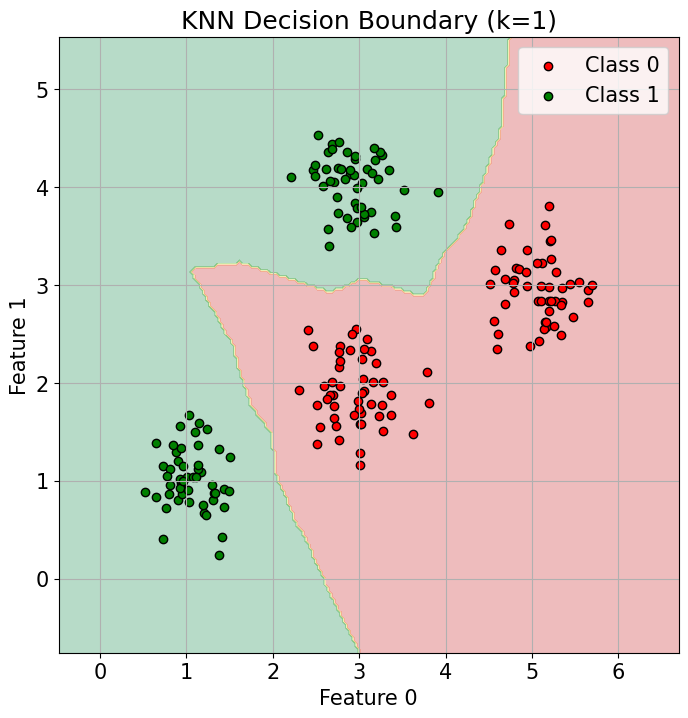

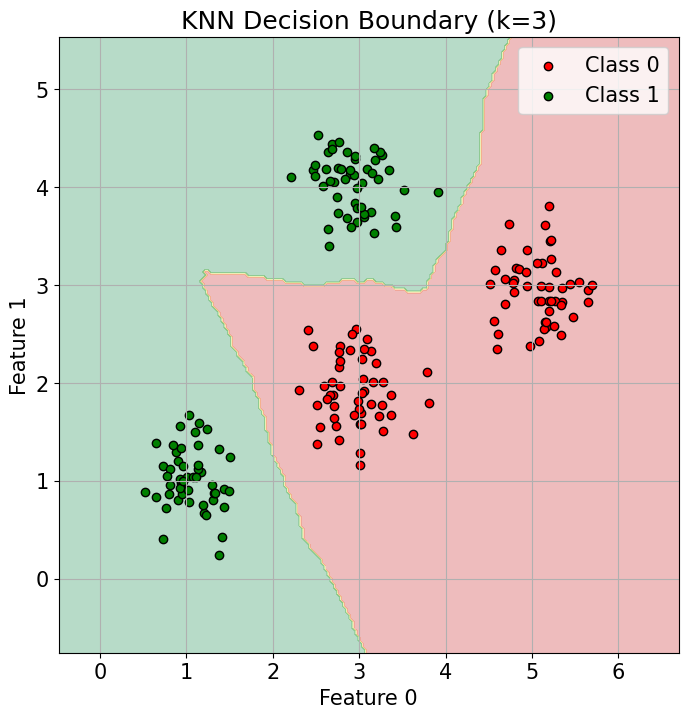

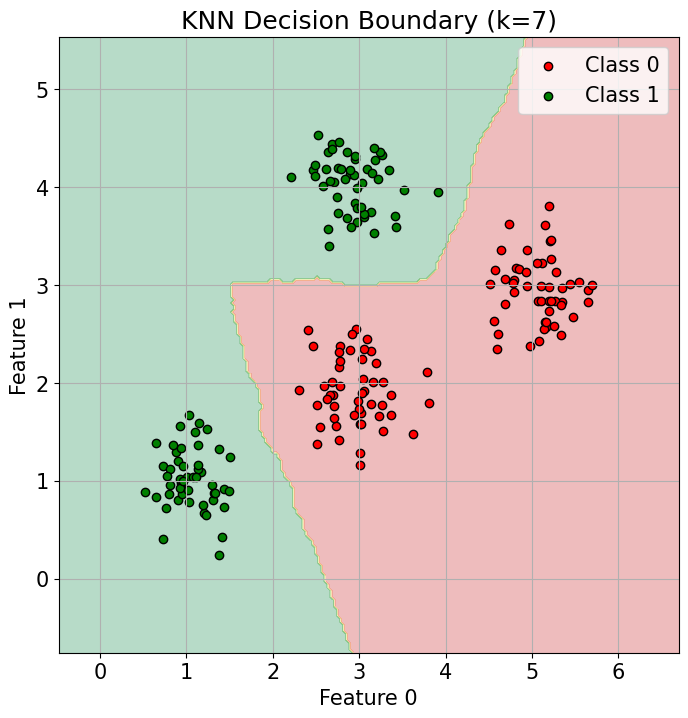

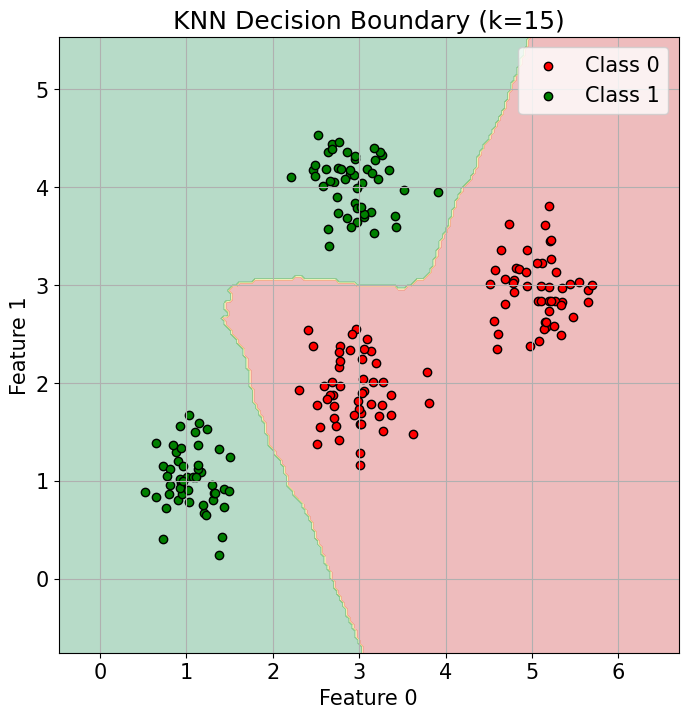

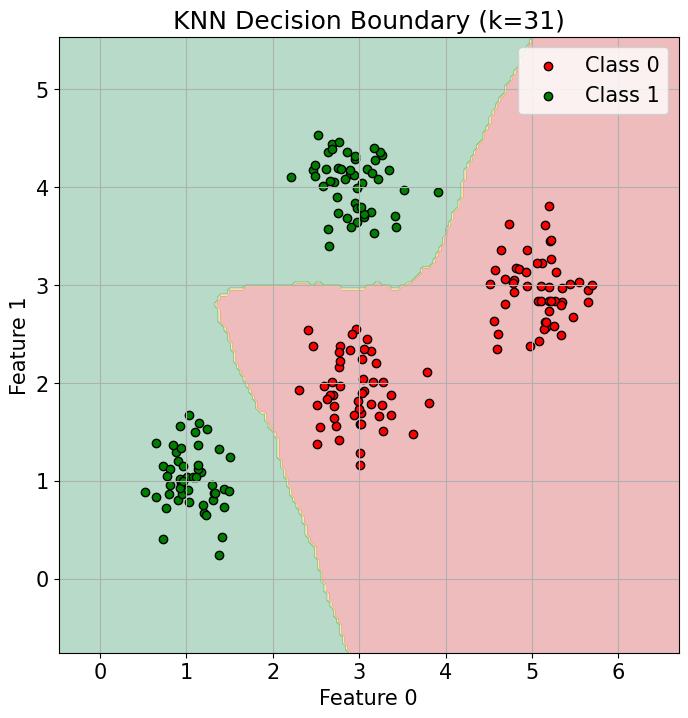

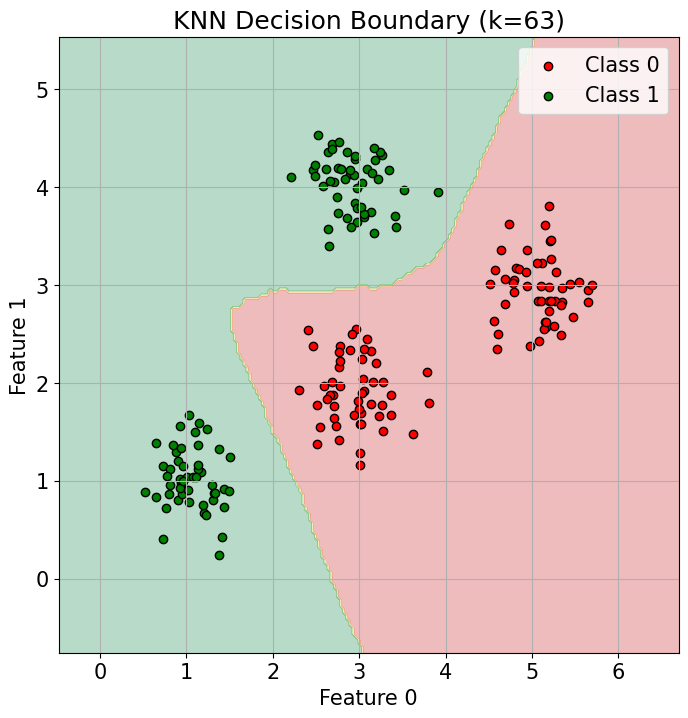

Observations:
- When k=1, the decision boundary is highly irregular and sensitive to individual data points, leading to a complex and 'noisy' boundary. This often results in overfitting.
- As k increases, the decision boundary becomes smoother, indicating that the model is considering more neighbors and generalizing better. However, a very large k might over-smooth and lose local patterns, leading to underfitting.
- For the given dataset, smaller k values (like 1 or 3) tend to isolate outlier points or small clusters, while larger k values create broader, more generalized regions.


In [19]:
### Solution ###
### Problem-13
def plot_knn_decision_boundary(X, y, k_values):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    for i, k in enumerate(k_values):
        Z = np.array([predict_knn(X, y, np.array([x, y_val]), k) for x, y_val in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 8))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlGn)
        plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', edgecolors='k')
        plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Class 1', edgecolors='k')
        plt.title(f'KNN Decision Boundary (k={k})')
        plt.xlabel('Feature 0')
        plt.ylabel('Feature 1')
        plt.legend()
        plt.grid(True)
        plt.show()

k_values_to_plot = [1, 3, 7, 15, 31, 63]
plot_knn_decision_boundary(X, y, k_values_to_plot)

print("Observations:")
print("- When k=1, the decision boundary is highly irregular and sensitive to individual data points, leading to a complex and 'noisy' boundary. This often results in overfitting.")
print("- As k increases, the decision boundary becomes smoother, indicating that the model is considering more neighbors and generalizing better. However, a very large k might over-smooth and lose local patterns, leading to underfitting.")
print("- For the given dataset, smaller k values (like 1 or 3) tend to isolate outlier points or small clusters, while larger k values create broader, more generalized regions.")